In [1]:
import pandas as pd
import numpy as np
import risk_kit_pradnya as rk
import matplotlib.pyplot as plt
import math

%load_ext autoreload
%autoreload 
%matplotlib inline


ind=pd.read_csv('Stocksportfolio.csv')
ind.set_index('Date',inplace=True)
er=rk.annualized_returns(ind)
cov=ind.cov()

ind.columns.str.strip()

Index(['Brigade enterprises', 'Suzlon', 'Omaxe', 'DLF', 'Infosys', 'HDFC bank',
       'HCL tech', 'Welspun india', 'Britannia', 'Asahi india'],
      dtype='object')

In [44]:
ind

,Brigade enterprises,Suzlon,Omaxe,DLF,Infosys,HDFC bank,HCL tech,Welspun india,Britannia,Asahi india
Date,,,,,,,,,,
01-08-2007,-0.025543,0.050922,0.025652,0.274226,0.104613,0.157457,0.163713,0.001277,0.043185,-0.027145
01-09-2007,-0.335633,0.304812,-0.204592,0.242004,-0.200703,-0.061222,-0.165988,-0.067602,-0.062843,-0.085812
01-10-2007,0.214180,-0.059151,-0.406701,-0.011210,-0.006509,-0.227781,-0.110825,-0.350205,-0.131188,10.062488
01-11-2007,-0.083802,0.185651,-0.167680,0.146524,-0.104467,-0.128049,-0.204743,-0.242105,-0.055063,-0.057522
01-12-2007,-0.430933,-0.016319,0.346555,-0.236054,-0.103228,0.247902,-0.161455,0.125000,0.192901,0.035902
...,...,...,...,...,...,...,...,...,...,...
01-03-2022,-0.006930,-0.148515,-0.132635,-0.022605,-0.040066,-0.014341,0.007099,-0.042137,-0.031288,0.032273
01-04-2022,-0.017987,-0.127907,0.073441,-0.070727,-0.122693,0.046948,-0.019489,0.376276,0.053538,-0.007586
01-05-2022,-0.026624,-0.226667,-0.055295,-0.095066,0.052325,-0.077364,0.076121,0.051941,0.022730,0.202455


In [45]:
er

Brigade enterprises    0.067912
Suzlon                -0.225992
Omaxe                 -0.040942
DLF                   -0.028716
Infosys                0.133634
HDFC bank              0.152217
HCL tech               0.231412
Welspun india          0.238145
Britannia              0.264264
Asahi india            0.387598
Name: 01-07-2022, dtype: float64

<Axes: >

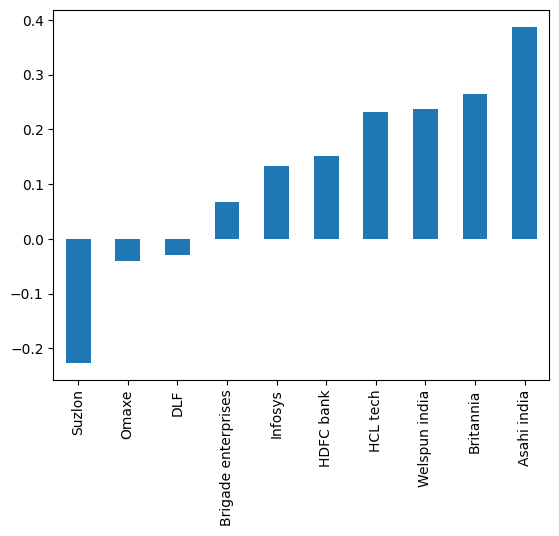

In [46]:
er.sort_values().plot.bar()

In [49]:
cov

,Brigade enterprises,Suzlon,Omaxe,DLF,Infosys,HDFC bank,HCL tech,Welspun india,Britannia,Asahi india
Brigade enterprises,0.026875,-0.000102,-0.002447,0.000515,-0.000164,-0.000272,-0.001277,-0.001518,-0.000759,0.009426
Suzlon,-0.000102,0.041215,-0.000503,0.000701,-0.001493,-0.000964,0.007956,0.001619,0.000484,-0.002233
Omaxe,-0.002447,-0.000503,0.012680,-0.001530,-0.000287,0.004480,0.001066,0.005752,0.001170,-0.021053
DLF,0.000515,0.000701,-0.001530,0.026623,-0.000490,0.000748,0.002577,-0.003900,-0.000451,-0.001967
Infosys,-0.000164,-0.001493,-0.000287,-0.000490,0.006244,0.001241,0.001802,0.002445,0.000965,0.000007
HDFC bank,-0.000272,-0.000964,0.004480,0.000748,0.001241,0.009005,0.002047,0.005826,0.002315,-0.013164
HCL tech,-0.001277,0.007956,0.001066,0.002577,0.001802,0.002047,0.042064,-0.000301,0.001467,-0.005805
Welspun india,-0.001518,0.001619,0.005752,-0.003900,0.002445,0.005826,-0.000301,0.032701,0.001901,-0.019281
Britannia,-0.000759,0.000484,0.001170,-0.000451,0.000965,0.002315,0.001467,0.001901,0.005400,-0.008218
Asahi india,0.009426,-0.002233,-0.021053,-0.001967,0.000007,-0.013164,-0.005805,-0.019281,-0.008218,0.573247


In [51]:
ew = np.repeat(0.1, 10)
rk.portfolio_return(ew, er)

0.11795313196773423

<Axes: xlabel='Volatility'>

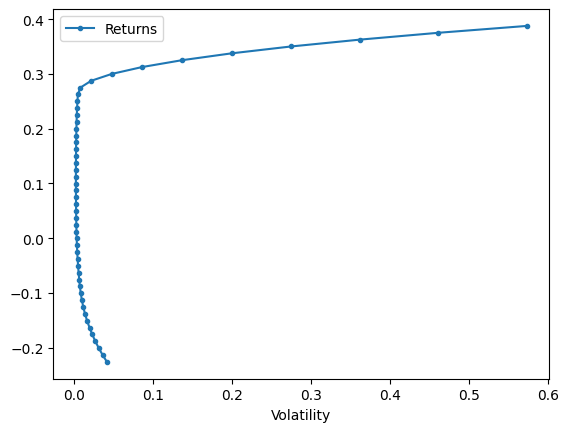

In [68]:
rk.plot_ef(50, er, cov)

In [69]:
rk.portfolio_vol(ew,cov)

0.007127245757060774

In [73]:
r_msr = rk.portfolio_return(weights_msr , er)
vol_msr = rk.portfolio_vol(weights_msr , cov)
weights_msr =rk. msr(0.03,er,cov)

In [74]:
r_msr

0.1972598547166537

In [75]:
vol_msr

0.0024772748668556886

In [76]:
weights_msr

array([0.07172346, 0.        , 0.01814332, 0.04492521, 0.21053904,
       0.05676723, 0.03737875, 0.04595798, 0.49778123, 0.01678379])

In [77]:
sharpe_msr=rk.portfolio_sharpe(r_msr,0.03,vol_msr)
sharpe_msr

67.51768120464982